In [1]:
#from KN import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from scipy import stats

In [2]:
!pip freeze

anyio==4.1.0
appnope==0.1.3
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==23.1.0
Babel==2.13.1
beautifulsoup4==4.12.2
bleach==6.1.0
certifi==2023.11.17
cffi==1.16.0
charset-normalizer==3.3.2
comm==0.2.0
contourpy==1.2.0
cycler==0.12.1
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
entrypoints==0.4
exceptiongroup==1.2.0
executing==2.0.1
fastjsonschema==2.19.0
fonttools==4.45.1
fqdn==1.5.1
idna==3.6
importlib-metadata==6.8.0
importlib-resources==6.1.1
ipykernel==6.27.1
ipython==8.18.1
isoduration==20.11.0
jedi==0.19.1
Jinja2==3.1.2
joblib==1.3.2
json5==0.9.14
jsonpointer==2.4
jsonschema==4.20.0
jsonschema-specifications==2023.11.1
jupyter-events==0.9.0
jupyter-lsp==2.2.1
jupyter_client==7.4.9
jupyter_core==5.5.0
jupyter_server==2.11.1
jupyter_server_terminals==0.4.4
jupyterlab==4.0.9
jupyterlab_pygments==0.3.0
jupyterlab_server==2.25.2
kiwisolver==1.4.5
MarkupSafe==2.1.3
matplotlib==3.8.2
matplotlib-inline==0.1.6
mistune==3.0.2


In [3]:
class KNeighborsClassifier:
    # initiate

    def __init__(self, k=3):
        self.k = k

    # fit function

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def calc(self, x1,x2,p):
        euclidean_distance = np.sqrt((np.subtract(np.array(x1),np.array(x2))**2).sum(axis=1))
        minkowski_distance = ((np.abs(np.array(x1) - np.array(x2))**p).sum(axis=1))**(1/p)
        manhattan_distance = (np.abs(np.array(x1) - np.array(x2))).sum(axis=1)
        return euclidean_distance, minkowski_distance, manhattan_distance

    # predict function
    def predict(self, test_data):
        test_data=test_data.to_numpy() 
        labels = np.zeros((3,500))
        for j in range(3): #her bir distance icin
            m = 0 # her test datasının yazıldığı sutun
            for value in test_data: # her test datası
                distances = np.array(self.calc(value, self.X_train,3)[j])
                k_inds = np.argsort(distances.T)[:self.k]
                classes_k = [self.y_train.iloc[i] for i in k_inds]
                mode_value = stats.mode(classes_k)
                labels[j,m] = (mode_value[0])
                m += 1
            correct_predictions = np.array(labels[j] == test_data[:,-1])
        return labels, correct_predictions
    

In [4]:
dataset = pd.read_csv('./dataset/htru2.csv')
training_data= dataset.iloc[0:5000]
test_data= dataset.iloc[5000:5500]
k_values = [1, 2, 3, 5, 10, 15, 20]

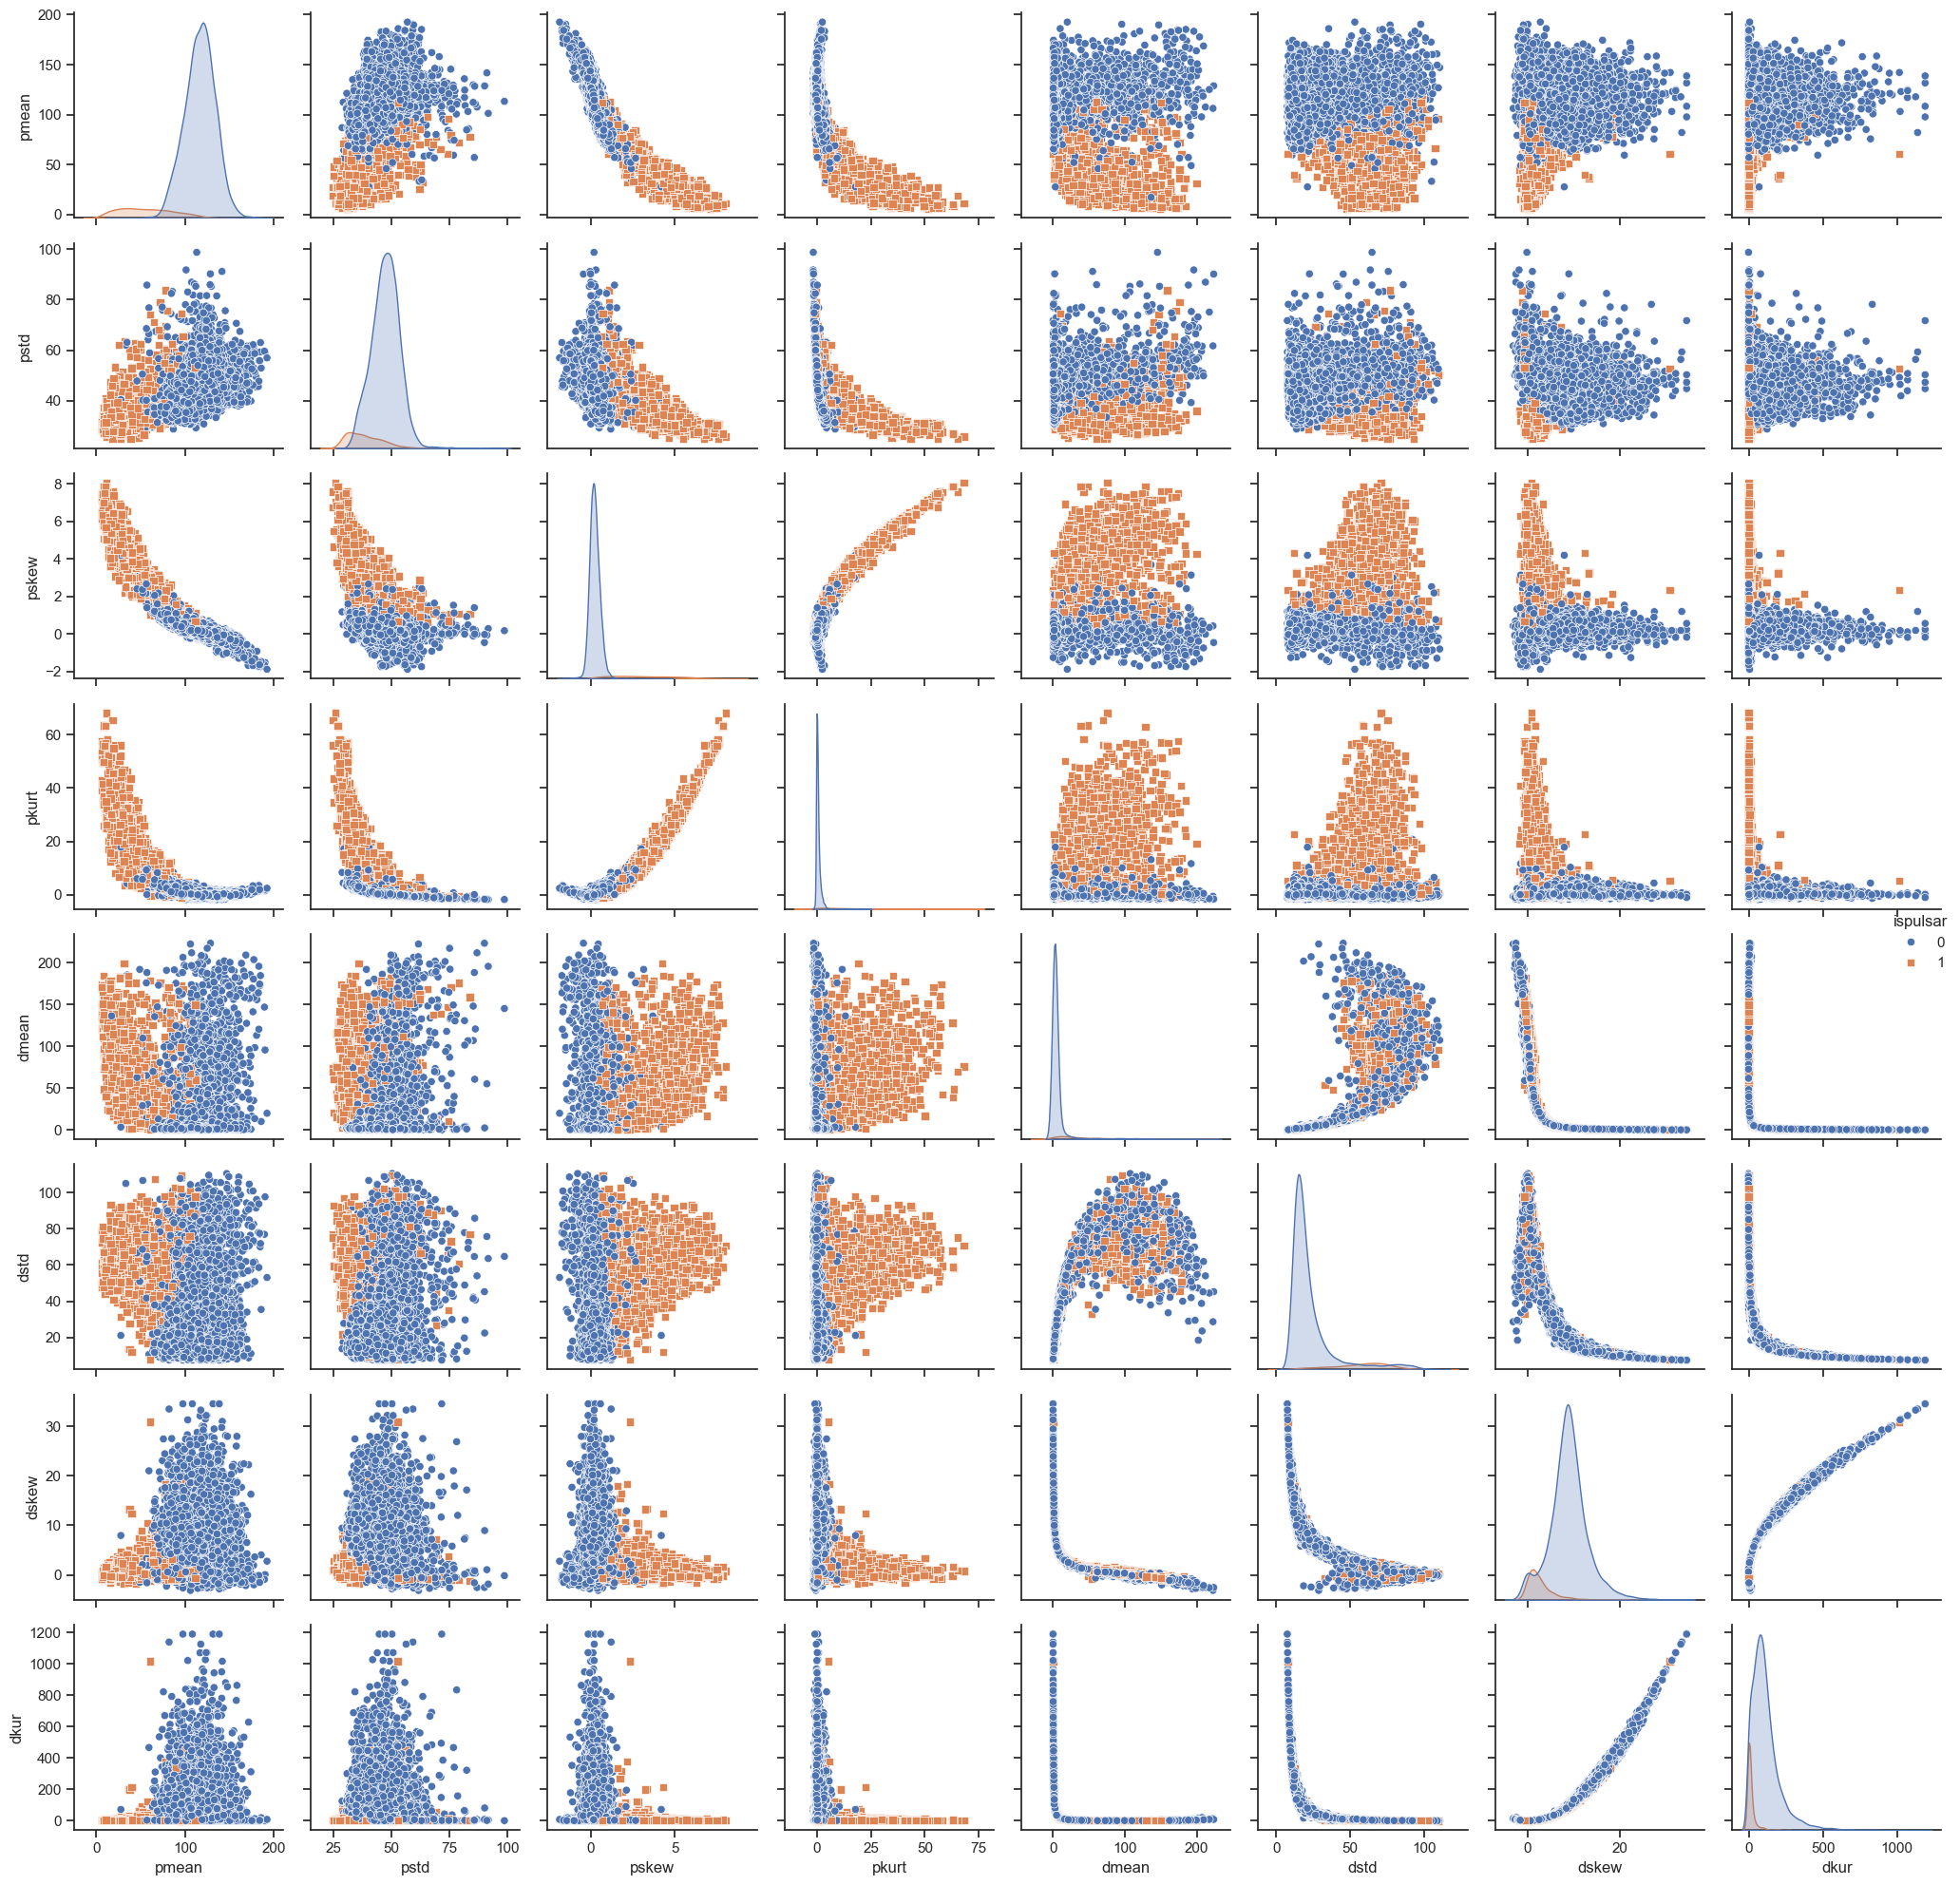

In [5]:
sns.set(style="ticks")
pair_plot = sns.pairplot(dataset, hue="ispulsar", markers=["o", "s"], diag_kind="kde")
plt.tight_layout()
plt.show()

In [6]:
all_predictions = np.zeros((len(k_values),3,test_data.values.shape[0]))
all_accuracy = np.zeros((len(k_values),3))


for index, k in enumerate(k_values):
    print(f"k: {k:.2f}")
    knn_model = KNeighborsClassifier(k)
    knn_model.fit(training_data, training_data['ispulsar'])
    predictions, correct_predictions = knn_model.predict(test_data)
    all_predictions[index]
    conf_matrix = np.zeros((predictions.shape[0],2,2))
    all_predictions[index] = predictions

    for i in range (predictions.shape[0]): 
        conf_matrix[i,:,:] = confusion_matrix(test_data['ispulsar'], predictions[i,:])
        precision = conf_matrix[i,1, 1] / (conf_matrix[i,1, 1] + conf_matrix[i,0, 1])
        recall = conf_matrix[i,1, 1] / (conf_matrix[i,1, 1] + conf_matrix[i,1, 0])
        f1 = 2 * (precision * recall) / (precision + recall)
        all_accuracy[index,i] = (conf_matrix[i,0,0] + conf_matrix[i,1,1])/np.sum(conf_matrix[i])
        
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1 Score: {f1:.2f}\n") 
    print(f"accuracy: {all_accuracy[index]}")
    print(f"Confusion Matrix:\n{conf_matrix}")

k: 1.00
Precision: 0.88
Recall: 0.87
F1 Score: 0.87

Precision: 0.88
Recall: 0.87
F1 Score: 0.87

Precision: 0.90
Recall: 0.85
F1 Score: 0.88

accuracy: [0.954 0.954 0.958]
Confusion Matrix:
[[[400.  11.]
  [ 12.  77.]]

 [[400.  11.]
  [ 12.  77.]]

 [[403.   8.]
  [ 13.  76.]]]
k: 2.00
Precision: 0.91
Recall: 0.84
F1 Score: 0.88

Precision: 0.90
Recall: 0.83
F1 Score: 0.87

Precision: 0.93
Recall: 0.85
F1 Score: 0.89

accuracy: [0.958 0.954 0.962]
Confusion Matrix:
[[[404.   7.]
  [ 14.  75.]]

 [[403.   8.]
  [ 15.  74.]]

 [[405.   6.]
  [ 13.  76.]]]
k: 3.00
Precision: 0.91
Recall: 0.87
F1 Score: 0.89

Precision: 0.90
Recall: 0.87
F1 Score: 0.88

Precision: 0.92
Recall: 0.87
F1 Score: 0.89

accuracy: [0.96  0.958 0.962]
Confusion Matrix:
[[[403.   8.]
  [ 12.  77.]]

 [[402.   9.]
  [ 12.  77.]]

 [[404.   7.]
  [ 12.  77.]]]
k: 5.00
Precision: 0.90
Recall: 0.85
F1 Score: 0.88

Precision: 0.91
Recall: 0.84
F1 Score: 0.88

Precision: 0.93
Recall: 0.88
F1 Score: 0.90

accuracy: [0.9

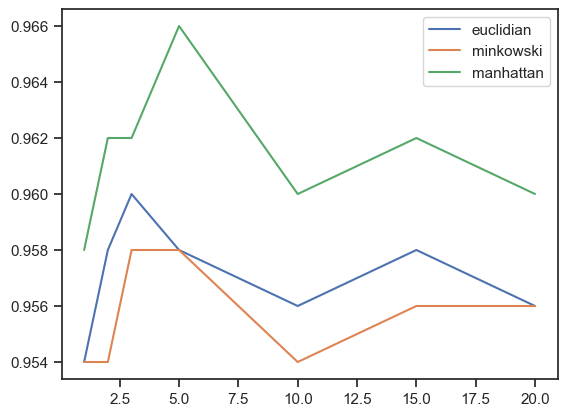

In [7]:
fig, ax = plt.subplots() 
ax.plot(k_values,all_accuracy[:,0])
ax.plot(k_values,all_accuracy[:,1])
ax.plot(k_values,all_accuracy[:,2])
ax.legend(["euclidian","minkowski","manhattan"])
plt.show()

In [8]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

num_folds = 5
skf = StratifiedKFold(n_splits=num_folds)

all_predictions = np.zeros((len(k_values), num_folds, test_data.values.shape[0]))
all_accuracy = np.zeros((len(k_values), num_folds))

mean_accuracy =  np.zeros(len(k_values))
std_accuracy = np.zeros(len(k_values))
for index, k in enumerate(k_values):
    print(f"k: {k:.2f}")
    
    for fold_index, (train_index, test_index) in enumerate(skf.split(training_data, training_data['ispulsar'])):
        print(f"Fold: {fold_index + 1}")
        
        knn_model = KNeighborsClassifier(k)
        knn_model.fit(training_data.iloc[train_index], training_data['ispulsar'].iloc[train_index])
        predictions = knn_model.predict(test_data)
        all_predictions[index, fold_index] = predictions

        conf_matrix = confusion_matrix(test_data['ispulsar'], predictions)
        precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
        recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
        f1 = 2 * (precision * recall) / (precision + recall)
        accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)
        all_accuracy[index, fold_index] = accuracy
        
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1 Score: {f1:.2f}")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Confusion Matrix:\n{conf_matrix}\n")
    
    mean_accuracy[index] = np.mean(all_accuracy[index])
    std_accuracy[index] = np.std(all_accuracy[index])
    print(f"Mean Accuracy: {mean_accuracy}")
    print(f"Standard Deviation of Accuracy: {std_accuracy}\n")


k: 1.00
Fold: 1
Precision: 0.88
Recall: 0.87
F1 Score: 0.87
Accuracy: 0.95
Confusion Matrix:
[[400  11]
 [ 12  77]]

Fold: 2
Precision: 0.88
Recall: 0.87
F1 Score: 0.87
Accuracy: 0.95
Confusion Matrix:
[[400  11]
 [ 12  77]]

Fold: 3
Precision: 0.90
Recall: 0.87
F1 Score: 0.88
Accuracy: 0.96
Confusion Matrix:
[[402   9]
 [ 12  77]]

Fold: 4
Precision: 0.88
Recall: 0.87
F1 Score: 0.87
Accuracy: 0.95
Confusion Matrix:
[[400  11]
 [ 12  77]]

Fold: 5
Precision: 0.87
Recall: 0.85
F1 Score: 0.86
Accuracy: 0.95
Confusion Matrix:
[[400  11]
 [ 13  76]]

Mean Accuracy: [0.9544 0.     0.     0.     0.     0.     0.    ]
Standard Deviation of Accuracy: [0.00195959 0.         0.         0.         0.         0.
 0.        ]

k: 2.00
Fold: 1
Precision: 0.93
Recall: 0.83
F1 Score: 0.88
Accuracy: 0.96
Confusion Matrix:
[[405   6]
 [ 15  74]]

Fold: 2
Precision: 0.91
Recall: 0.83
F1 Score: 0.87
Accuracy: 0.96
Confusion Matrix:
[[404   7]
 [ 15  74]]

Fold: 3
Precision: 0.91
Recall: 0.80
F1 Score: 0.8

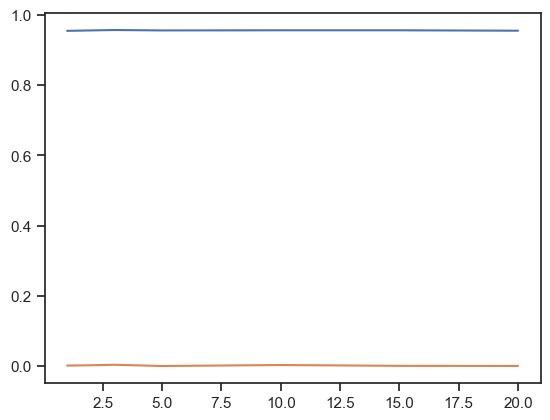

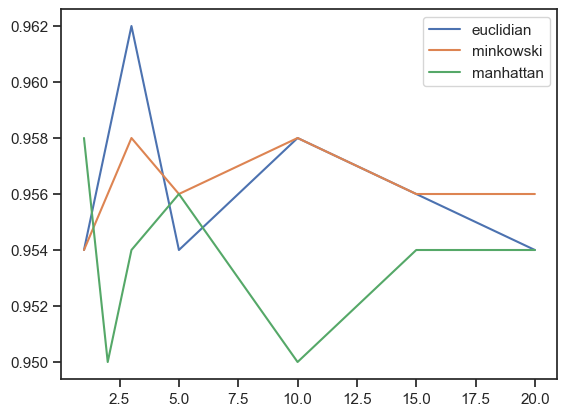

In [9]:
fig, ax = plt.subplots() 
ax.plot(k_values,mean_accuracy)
ax.plot(k_values,std_accuracy)
#ax.plot(k_values,all_accuracy[:,2])
#ax.legend(["euclidian","minkowski","manhattan"])
plt.show()
fig, ax = plt.subplots() 
ax.plot(k_values,all_accuracy[:,0])
ax.plot(k_values,all_accuracy[:,1])
ax.plot(k_values,all_accuracy[:,2])
ax.legend(["euclidian","minkowski","manhattan"])
plt.show()

# K-Nearest Neighbors (KNN) Classifier Performance Analysis

The provided output shows the performance of a K-Nearest Neighbors (KNN) classifier with different values of k (number of neighbors) using a 5-fold cross-validation on a pulsar star dataset. Here are some observations:

## 1. Model Performance:
   - The precision, recall, F1 score, and accuracy metrics are reported for each fold and each value of k. These metrics provide insights into the model's ability to correctly identify pulsar stars.

## 2. K Values:
   - The performance is evaluated for different values of k, ranging from 1 to 20.
   - As expected, the choice of k influences the model's performance. For example, with k=1, the model achieves high accuracy, but it might be sensitive to noise or outliers. As k increases, the model tends to be more robust but may smooth out local variations.

## 3. Accuracy Scores:
   - The mean accuracy across folds is calculated for each value of k.
   - The mean accuracy generally increases with higher values of k, suggesting that a more generalized model is obtained with larger neighborhoods.

## 4. Precision, Recall, and F1 Score:
   - These metrics provide a more detailed evaluation of the model's performance, especially in the context of imbalanced datasets.
   - Precision, recall, and F1 score values are relatively consistent across folds and k values, indicating a stable performance.

## 5. Standard Deviation of Accuracy:
   - The standard deviation of accuracy is low, suggesting that the model's performance is consistent across different folds and values of k.

## 6. Overall Observations:
   - The model seems to perform well, achieving high accuracy and maintaining stable precision, recall, and F1 score values across different folds and k values.
   - The choice of the best k value could depend on a balance between precision, recall, and the desired level of smoothing or robustness.

## 7. Consideration for Imbalanced Data:
   - It's crucial to consider the imbalanced nature of the dataset when interpreting results. Precision, recall, and F1 score provide a more detailed understanding of how well the model is performing, especially in correctly identifying pulsar stars.

## 8. Final Remarks:
   - The choice of the best k value may depend on the specific requirements of the problem at hand. A trade-off between model simplicity and performance should be considered.

In summary, the results suggest that the KNN model is effective in classifying pulsar stars in this dataset, and the choice of k influences the trade-off between accuracy and model robustness. The inclusion of precision, recall, and F1 score metrics provides a more comprehensive evaluation of the model's performance.


When checking the test data, we observed that different values of k yielded better results in various distance measurement methods. For Manhattan, the optimal value was k=5, while for Euclidean and Minkowski, this value was 3. As the value of k increased, our accuracy rate started to decrease, indicating that the excessive complexity of our training data might lead to some kind of noise.